## MAP and nDCG 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [14]:
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt","none"]
map = [0.273885, 0.270678, 0.245353, 0.266312, 0.249784, 0.238835, 0.222357]
nDCG = [0.537582, 0.501087, 0.494990, 0.523511, 0.464134, 0.494408, 0.442813]

data = {"Stemmer": labels, "MAP": map, "nDCG": nDCG}
df = pd.DataFrame(data=data)
df = df.melt(id_vars="Stemmer").rename({"variable": "Measure", "value": "Score"}, axis="columns")

In [15]:
print(df)

       Stemmer Measure     Score
0    paiceHusk     MAP  0.273885
1      krovetz     MAP  0.270678
2   sStripping     MAP  0.245353
3      porter2     MAP  0.266312
4       lovins     MAP  0.249784
5         wikt     MAP  0.238835
6         none     MAP  0.222357
7    paiceHusk    nDCG  0.537582
8      krovetz    nDCG  0.501087
9   sStripping    nDCG  0.494990
10     porter2    nDCG  0.523511
11      lovins    nDCG  0.464134
12        wikt    nDCG  0.494408
13        none    nDCG  0.442813


Text(0.5, 1.0, 'MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection')

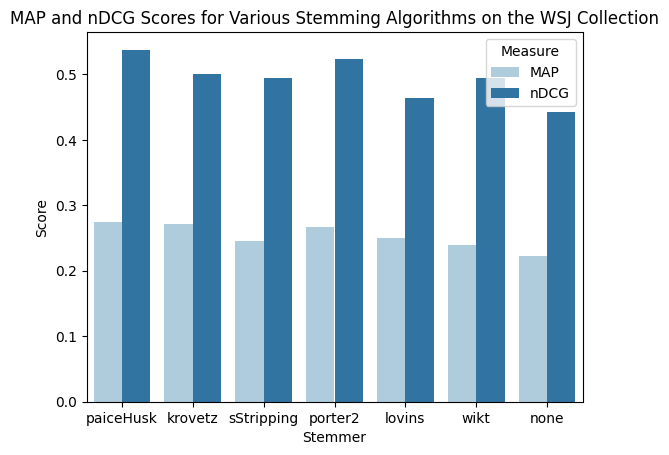

In [16]:
sns.barplot(x="Stemmer", y="Score", hue="Measure", data=df, palette=sns.color_palette("Paired"))
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")

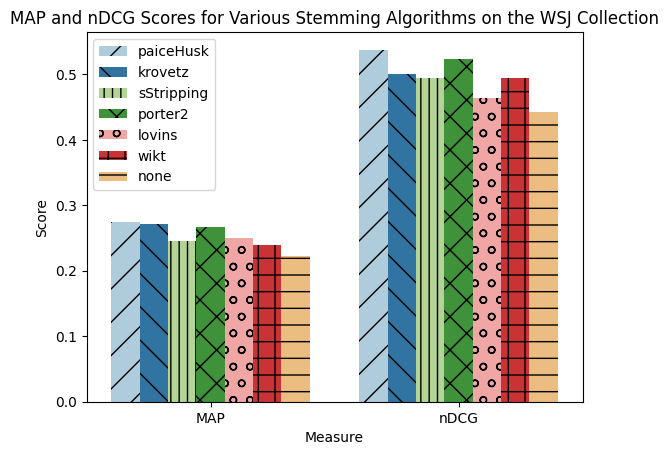

In [17]:
ax = sns.barplot(x="Measure", y="Score", hue="Stemmer", data=df, palette=sns.color_palette("Paired"))
hatches = itertools.cycle([ "/", "\\", "||", "x", "o", "+", "-"])
num_stemmers = 2
for i, bar in enumerate(ax.patches):
    if i % num_stemmers == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
ax.legend(loc="best")
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")
plt.show()

## Average F-Measure vs MAP and Average F-Measure vs nDCG

In [22]:
from os import path

data_dir = path.join("Data","wikt")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt"]

paiceHusk_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_before_cluster_fmeasures.csv"))
krovetz_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_before_cluster_fmeasures.csv"))
sStripping_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_before_cluster_fmeasures.csv"))
porter2_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_before_cluster_fmeasures.csv"))
lovins_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_before_cluster_fmeasures.csv"))

before = [paiceHusk_before_cluster_fmeasures, krovetz_before_cluster_fmeasures, sStripping_before_cluster_fmeasures, porter2_before_cluster_fmeasures, lovins_before_cluster_fmeasures]

averages = list()
for stemmer in before:
    averages.append(stemmer.mean())
averages.append(1)

data = {
    "Stemmer" : labels[:],
    "F-Measure" : averages,
    "Marker" : ["o","^","s","*","d","x"],
    "Colour" : ["tab:red","tab:orange","tab:green","tab:blue","tab:purple","tab:pink"]
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,F-Measure,Marker,Colour
0,paiceHusk,0.615709,o,tab:red
1,krovetz,0.554588,^,tab:orange
2,sStripping,0.464913,s,tab:green
3,porter2,0.548461,*,tab:blue
4,lovins,0.583960,d,tab:purple
5,wikt,1.000000,x,tab:pink


In [23]:
merged_df = df.merge(average_fmeasures)
merged_df

,Stemmer,Measure,Score,F-Measure,Marker,Colour
0,paiceHusk,MAP,0.273885,0.615709,o,tab:red
1,paiceHusk,nDCG,0.537582,0.615709,o,tab:red
2,krovetz,MAP,0.270678,0.554588,^,tab:orange
3,krovetz,nDCG,0.501087,0.554588,^,tab:orange
4,sStripping,MAP,0.245353,0.464913,s,tab:green
5,sStripping,nDCG,0.494990,0.464913,s,tab:green
6,porter2,MAP,0.266312,0.548461,*,tab:blue
7,porter2,nDCG,0.523511,0.548461,*,tab:blue
8,lovins,MAP,0.249784,0.583960,d,tab:purple
9,lovins,nDCG,0.464134,0.583960,d,tab:purple


### MAP

R^2: 0.40133440486262795
Pearson's R: 0.6335095933469579 (pVal: 0.251176509485115)


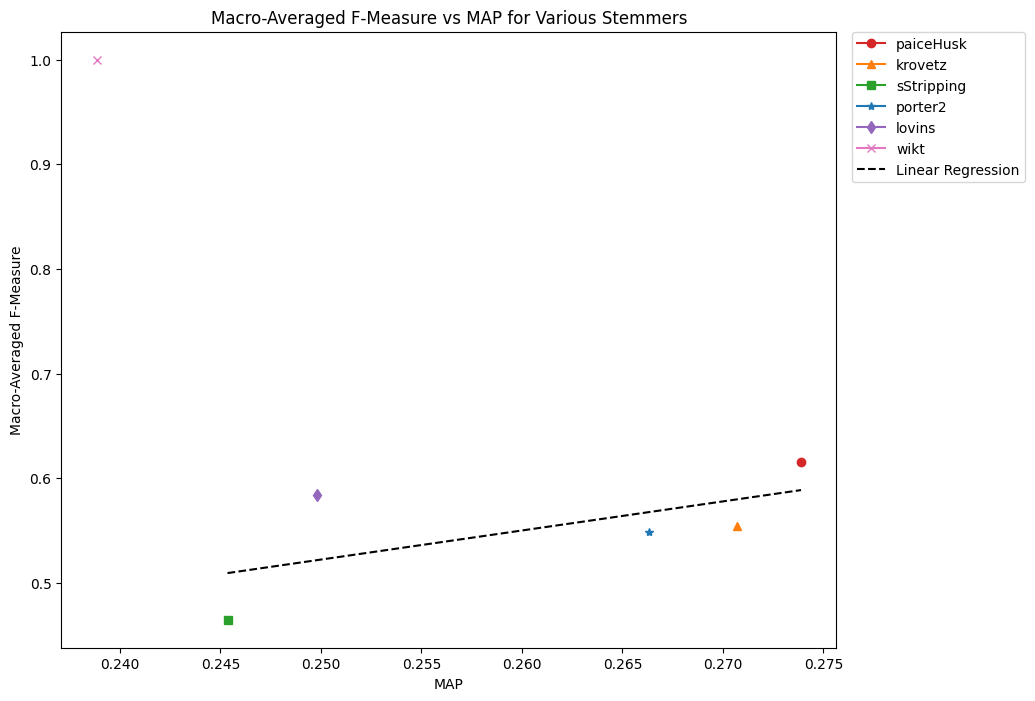

In [76]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

TARGET_COL = "MAP"
target_df = merged_df[merged_df["Measure"]==TARGET_COL]
target_df_sorted = target_df.sort_values(by="Score").drop([10])
X = target_df_sorted["Score"].to_numpy().reshape(-1,1)
y = target_df_sorted["F-Measure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
for _, row in target_df.iterrows():
    plt.plot(row["Score"], row["F-Measure"], marker=row["Marker"], color=row["Colour"], label=row["Stemmer"])

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("MAP")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

### nDCG

R^2: 0.06114316934756381
Pearson's R: 0.24727144871085405 (pVal: 0.6884026437758745)


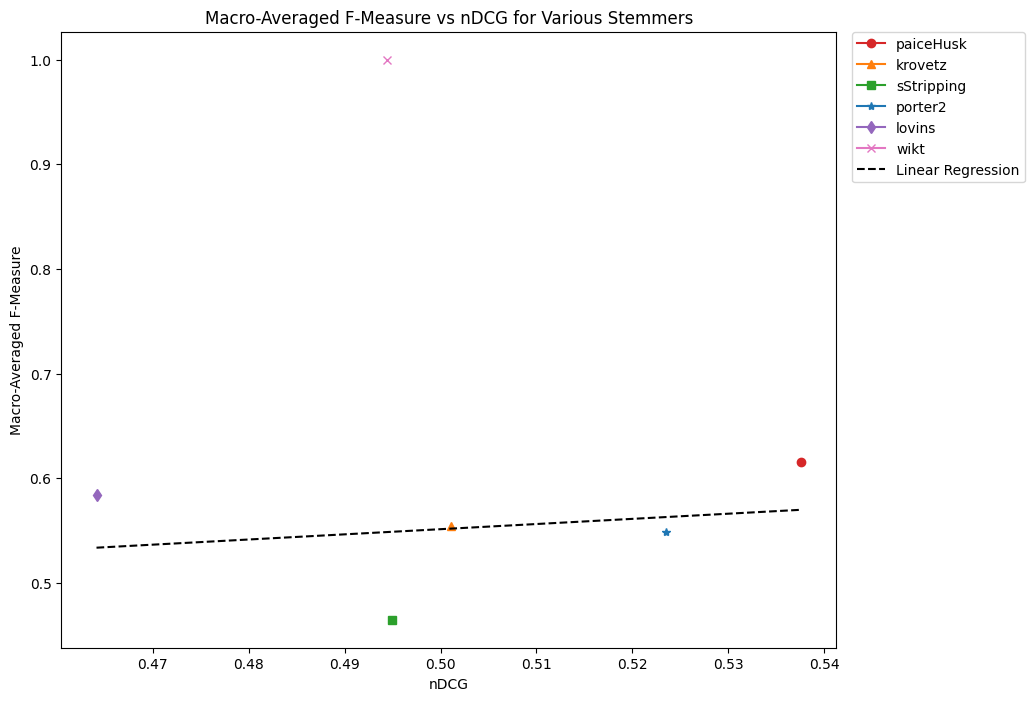

In [82]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

MARKERS = ["o","^","s","*","d"]
TARGET_COL = "nDCG"
target_df = merged_df[merged_df["Measure"]==TARGET_COL]
target_df_sorted = target_df.sort_values(by="Score").drop([11])
X = target_df_sorted["Score"].to_numpy().reshape(-1,1)
y = target_df_sorted["F-Measure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
# i=0
for _, row in target_df.iterrows():
    plt.plot(row["Score"], row["F-Measure"], marker=row["Marker"], color=row["Colour"], label=row["Stemmer"])
    # i+=1

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("nDCG")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()